<a href="https://colab.research.google.com/github/shanju65/Data-Science-Internship-ProdigyInfotech/blob/main/TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Mall_Customers.csv to Mall_Customers.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


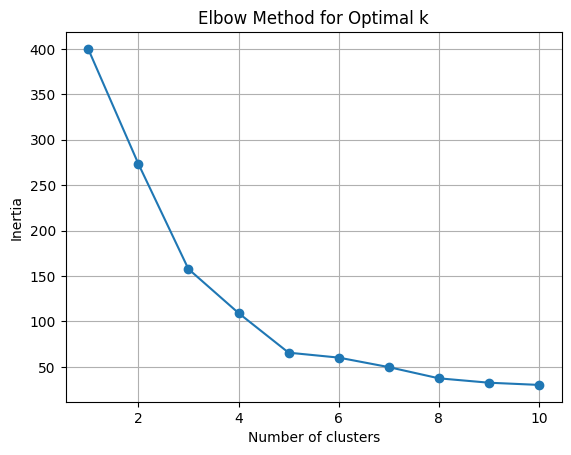

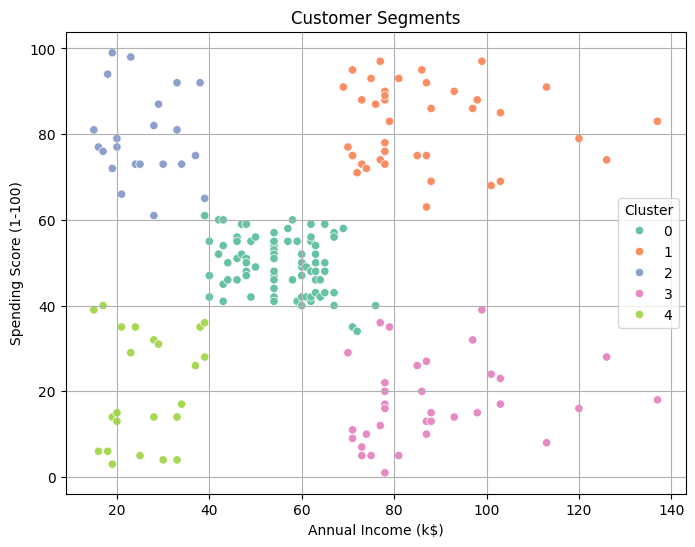

In [1]:
# ==========================
# 🛒 Customer Segmentation using K-Means
# ==========================

# 📦 1. Install & Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 📥 2. Upload the dataset
from google.colab import files
uploaded = files.upload()  # Upload 'Mall_Customers.csv'

# 📊 3. Load and Inspect
df = pd.read_csv("Mall_Customers.csv")
df.head()
df.info()

# 📉 4. Select useful features for clustering (e.g. Annual Income & Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 📏 5. Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔍 6. Find optimal k using Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 🧠 7. Apply KMeans with optimal k (e.g., k=5 based on elbow plot)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 🎨 8. Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title('Customer Segments')
plt.grid(True)
plt.show()

# 📌 9. Optional: Use PCA for dimensionality reduction and better visualization (if using more features)
